In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
df = pd.read_csv("german_credit_data.csv",index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [34]:
df.replace(0, "Unskilled and Non-resident", inplace=True)
df.replace(1, "Unskilled and Resident", inplace=True)
df.replace(2, "Skilled", inplace=True)
df.replace(3, "Highly skilled", inplace=True)

In [35]:
df.iloc[pd.np.r_[0:10, -10:0]]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,Skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,Skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,Unskilled and Resident,own,little,NaN,2096,12,education,good
3,45,male,Skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,Skilled,free,little,little,4870,24,car,bad
5,35,male,Unskilled and Resident,free,NaN,NaN,9055,36,education,good
6,53,male,Skilled,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,Highly skilled,rent,little,moderate,6948,36,car,good
8,61,male,Unskilled and Resident,own,rich,NaN,3059,12,radio/TV,good
9,28,male,Highly skilled,own,little,moderate,5234,30,car,bad


# Exploring the dataset

Let's first look at the distribution of different credit risks.

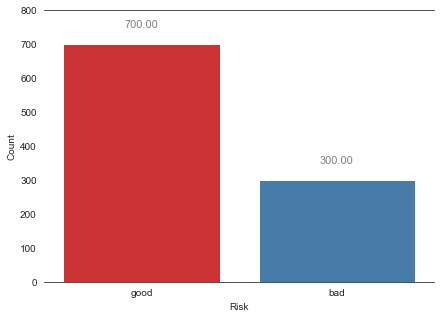

In [47]:
def draw_bars(column, ylimit = 800, figsize=(7,5), palette="Set1"):
    plt.figure(figsize=(7,5))
    sns.set_style("white")
    ax= sns.countplot(x=column, data=df, palette="Set1")
    plt.ylabel('Count')
    for p in ax.patches:
                 ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                     textcoords='offset points')
    ax.set_ylim(0,ylimit) #To make space for the annotations
    sns.despine(left=True, top=False)
    plt.show()

draw_bars('Risk')

As seen from the graph, there are 400 more cases of good credit risks.

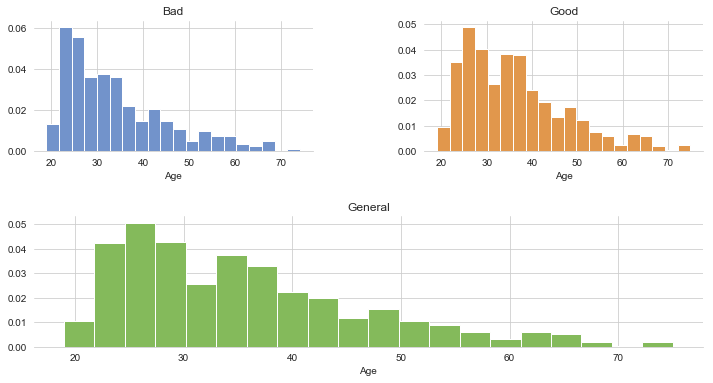

In [6]:
# Age distribution
sns.set_style('whitegrid')
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.5)
plt.figure(figsize=(12,6))
# Bad credit
ax1 = plt.subplot(grid[0, 0])
ax1 = plt.hist(df[df['Risk'] == 'bad']['Age'], color='#7293cb', density=True, bins=20)
plt.title('Bad')
plt.xlabel("Age")
# Good credit
ax2 = plt.subplot(grid[0, 1])
ax2 = plt.hist(df[df['Risk'] == 'good']['Age'], color='#e1974c', density=True, bins=20)
plt.title('Good')
plt.xlabel("Age")
# General
ax3 = plt.subplot(grid[1, :])
ax3 = plt.hist(df['Age'], color='#84ba5b', bins=20, density=True)
plt.title('General')
plt.xlabel("Age")
sns.despine(left=True)

As seen from the distributions, majority of invidiuals that get credit are young people from mid 20 to 40 years old.
<br>
In general, people with bad credit scores are younger than those with good credit scores.
<br>
People classified as bad credit risks tend be around mid-20 years old.

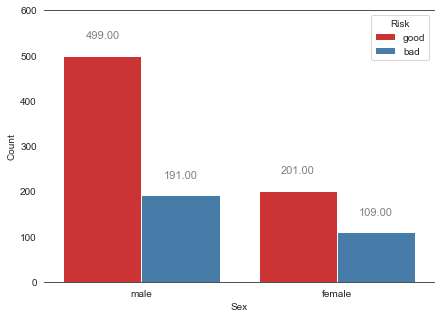

In [49]:
# Gender distribution
def draw_bars_with_hue(column, ylimit = 800, figsize=(7,5), palette="Set1"):
    plt.figure(figsize=figsize)
    sns.set_style("white")
    ax= sns.countplot(x=column, hue='Risk', data=df, palette=palette)
    plt.ylabel('Count')
    for p in ax.patches:
                 ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                     textcoords='offset points')
    ax.set_ylim(0,ylimit) #To make space for the annotations
    sns.despine(left=True, top=False)
    plt.show()
    
draw_bars_with_hue('Sex', 600)

Males take up a larger proportion of the dataset.

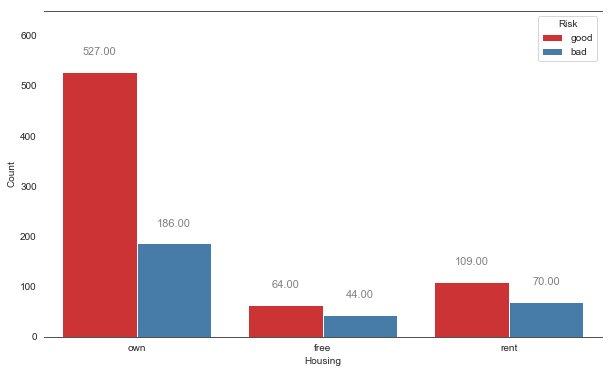

In [59]:
# Housing distribution
draw_bars_with_hue('Housing', 650, figsize=(10,6))

Majority own a house while the number of people with free housing is the lowest.<br>
The number of people renting is marginally larger than those with free housing. <br>
People with free housing or renting are more likely to be bad credit risks.

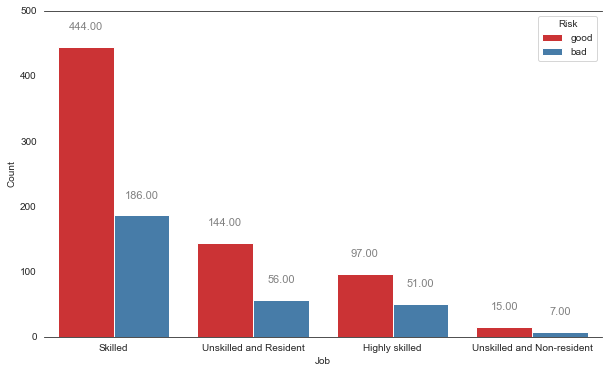

In [58]:
# Jobs
draw_bars_with_hue("Job", 500, figsize=(10,6))

Skilled individuals, Unskilled and Resident people are more likely to be good credit risk. <br>
Surprisingly, roughly half of highly skilled people are bad credit risk. <br>
The last group has too small of a sample size to make any concrete conclusions.

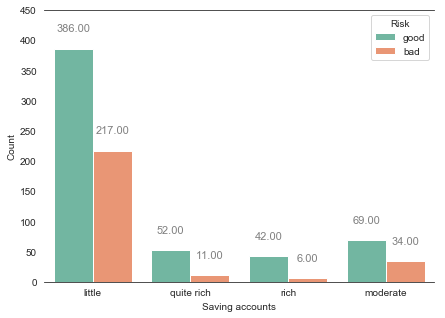

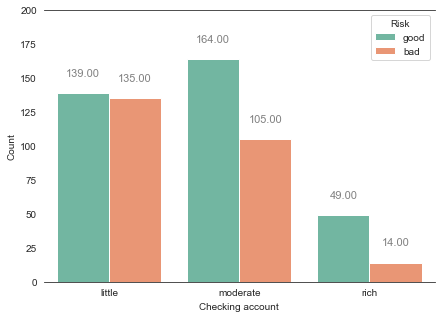

In [81]:
# Saving and Checking accounts
draw_bars_with_hue('Saving accounts', 450, palette='Set2')
draw_bars_with_hue('Checking account', 200, palette='Set2')

Unsurprisingly, redit risks reduce as the amount in either saving accounts or checking accounts increase. <br>

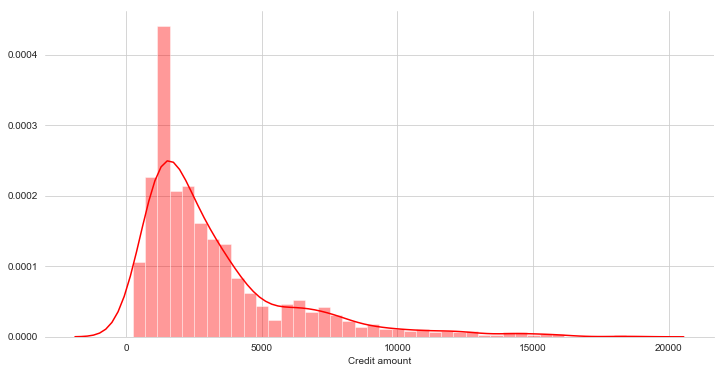

In [115]:
# Credit amount distribution
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(df['Credit amount'], color='r',hist=True, bins=40)
sns.despine(left = True)

Most people try to obtain a credit amount of roughly 1500-2000.

In [118]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.linear_model import LogisticRegression